In [2]:
# EDA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Load Data
daily_data = pd.read_csv('data/daily_data.csv')
products = pd.read_csv('data/products.csv')
promo = pd.read_csv('data/promo.csv')


In [3]:
# Convert date columns to datetime
daily_data['date'] = pd.to_datetime(daily_data['date'])
promo['begin_date'] = pd.to_datetime(promo['begin_date'])
promo['end_date'] = pd.to_datetime(promo['end_date'])

In [4]:
daily_data = daily_data.merge(products, on='sku', how='left')

In [21]:
# Check for temporal leaks
print("\nChecking for Temporal Consistency")
print("Earliest Date in Daily Data:", daily_data['date'].min())
print("Latest Date in Daily Data:", daily_data['date'].max())


Checking for Temporal Consistency
Earliest Date in Daily Data: 2022-01-01 00:00:00
Latest Date in Daily Data: 2024-02-29 00:00:00


In [5]:
print("Daily Data Overview")
print(daily_data.head())
print("\nProducts Data Overview")
print(products.head())
print("\nPromotions Data Overview")
print(promo.head())

Daily Data Overview
        sku  warehouse_code       date  sale_price  balance  qnt_out_sale  \
0  13350850          278850 2022-01-01        35.4      0.0           0.0   
1  14151850          192850 2022-01-01        34.1      9.0           1.0   
2  14151850          192850 2022-01-02        34.1      8.0           1.0   
3  14151850          192850 2022-01-03        34.1      7.0           1.0   
4  14151850          192850 2022-01-04        34.1      6.0           1.0   

   net_weight  category_id  rsl  
0        0.00       700850   12  
1        2.11       789850  120  
2        2.11       789850  120  
3        2.11       789850  120  
4        2.11       789850  120  

Products Data Overview
        sku  net_weight  category_id  rsl
0  10043850        0.00       789850  365
1  10044850        2.11       789850  300
2  10237850        0.00       700850   90
3  10238850        0.00       700850  365
4  10423850        0.00       700850  365

Promotions Data Overview
    id begi

In [6]:
# Summary Statistics
print("\nSummary Statistics of Daily Data")
print(daily_data.describe())

print("\nSummary Statistics of Products Data")
print(products.describe())

print("\nSummary Statistics of Promotions Data")
print(promo.describe())



Summary Statistics of Daily Data
                sku  warehouse_code     sale_price        balance  \
count  9.016110e+05   901611.000000  900826.000000  878242.000000   
mean   3.006739e+07   144223.982793      28.008437       6.910271   
std    1.428674e+07    85531.115394      15.318525      13.713867   
min    3.208500e+05    67850.000000       0.000000       0.000000   
25%    2.065185e+07    67850.000000      17.900000       0.000000   
50%    3.459285e+07    72850.000000      26.000000       0.000000   
75%    4.199185e+07   192850.000000      36.500000      10.000000   
max    4.761085e+07   278850.000000     173.100000     505.000000   

        qnt_out_sale     net_weight   category_id            rsl  
count  878242.000000  901611.000000  9.016110e+05  901611.000000  
mean        0.480154       0.286754  8.820689e+05     278.083699  
std         1.763110       0.515141  1.857115e+05     127.914616  
min         0.000000       0.000000  7.008500e+05       5.000000  
25%      

In [7]:
# Missing Values
print("\nMissing Values in Daily Data")
print(daily_data.isnull().sum())

print("\nMissing Values in Products Data")
print(products.isnull().sum())

print("\nMissing Values in Promotions Data")
print(promo.isnull().sum())



Missing Values in Daily Data
sku                   0
warehouse_code        0
date                  0
sale_price          785
balance           23369
qnt_out_sale      23369
net_weight            0
category_id           0
rsl                   0
dtype: int64

Missing Values in Products Data
sku            0
net_weight     0
category_id    0
rsl            0
dtype: int64

Missing Values in Promotions Data
id                0
begin_date        0
end_date          0
sku               0
warehouse_code    0
period_type_id    0
dtype: int64


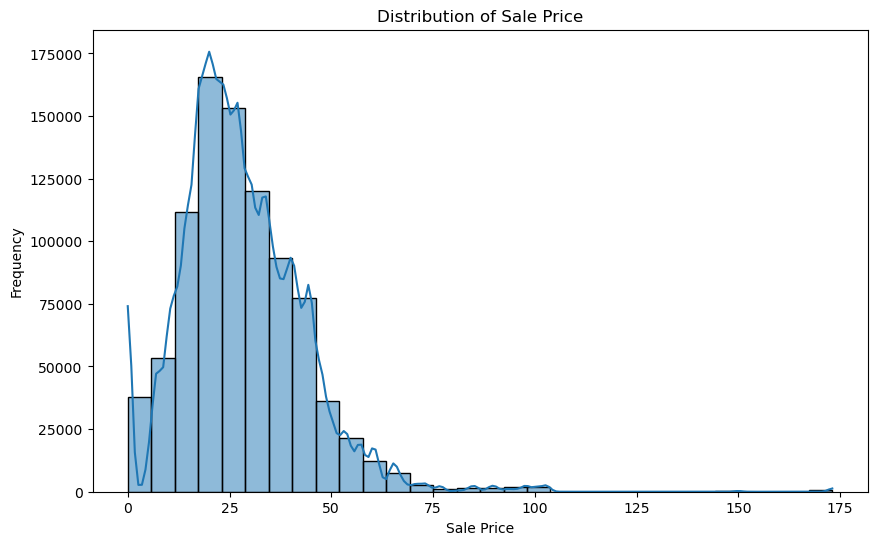

In [8]:
# Distribution of Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['sale_price'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

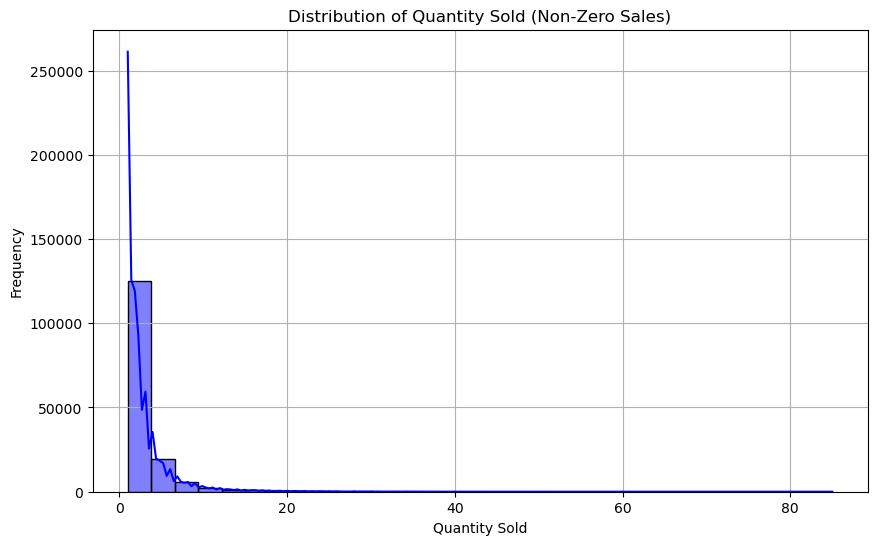

/var/folders/gr/0c7p9r_s4hsbtm9g6rybp0lh0000gn/T/ipykernel_86152/2796870931.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_sales['log_qnt_out_sale'] = np.log1p(non_zero_sales['qnt_out_sale'])


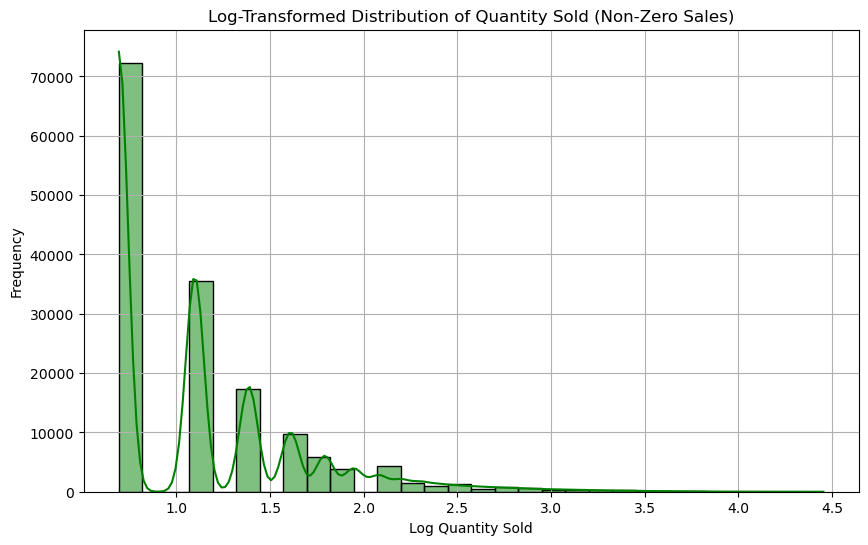

In [22]:
# Remove zero sales
non_zero_sales = daily_data[daily_data['qnt_out_sale'] > 0]

# Plotting the distribution without zero sales
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_sales['qnt_out_sale'], kde=True, bins=30, color='blue')
plt.title('Distribution of Quantity Sold (Non-Zero Sales)')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Log transformation for better visualization
non_zero_sales['log_qnt_out_sale'] = np.log1p(non_zero_sales['qnt_out_sale'])

plt.figure(figsize=(10, 6))
sns.histplot(non_zero_sales['log_qnt_out_sale'], kde=True, bins=30, color='green')
plt.title('Log-Transformed Distribution of Quantity Sold (Non-Zero Sales)')
plt.xlabel('Log Quantity Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

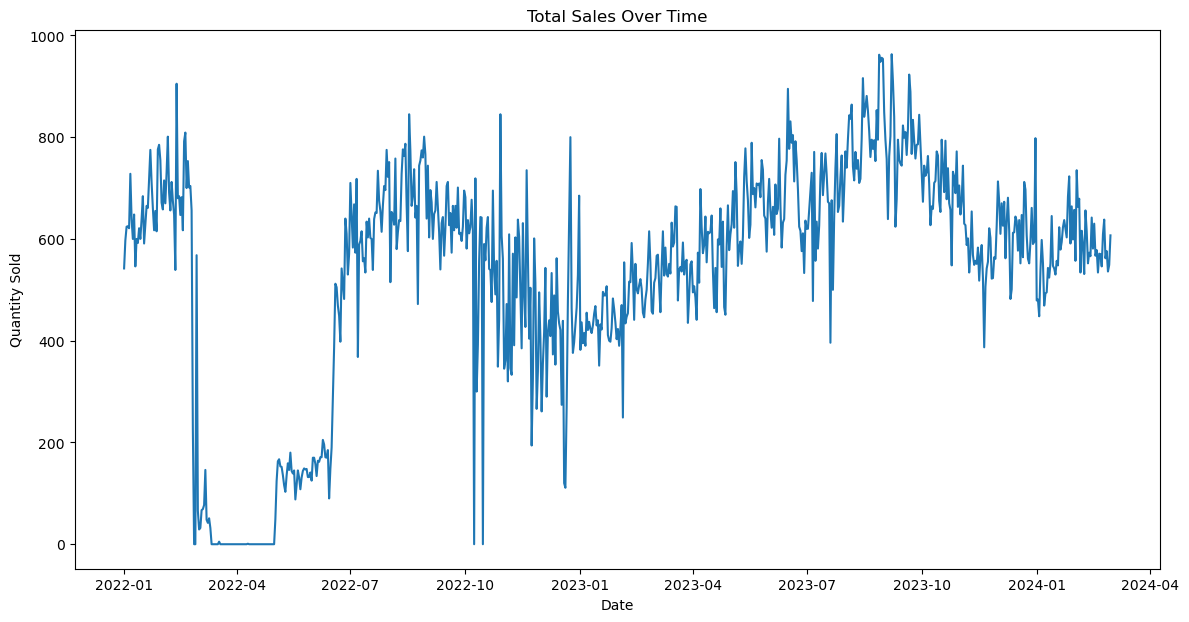

In [10]:
daily_sales = daily_data.groupby('date')['qnt_out_sale'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='date', y='qnt_out_sale')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()


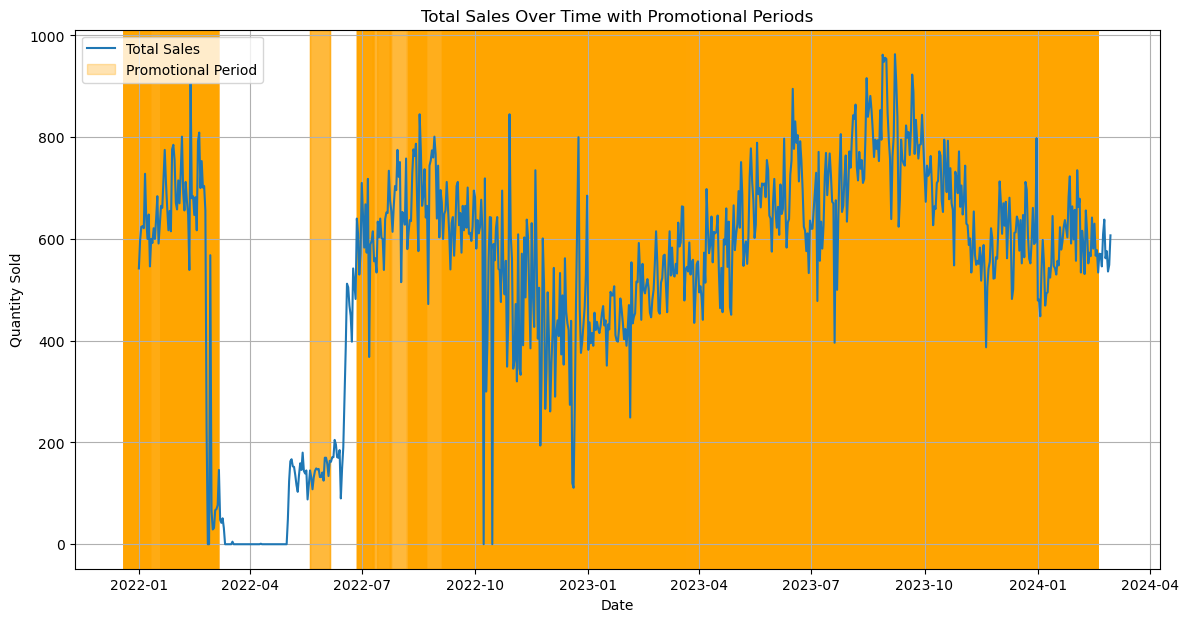

In [24]:
# Sales Over Time
daily_sales = daily_data.groupby('date')['qnt_out_sale'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='date', y='qnt_out_sale', label='Total Sales')
for _, row in promo.iterrows():
    plt.axvspan(row['begin_date'], row['end_date'], color='orange', alpha=0.3)
plt.title('Total Sales Over Time with Promotional Periods')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend(['Total Sales', 'Promotional Period'])
plt.grid(True)
plt.show()

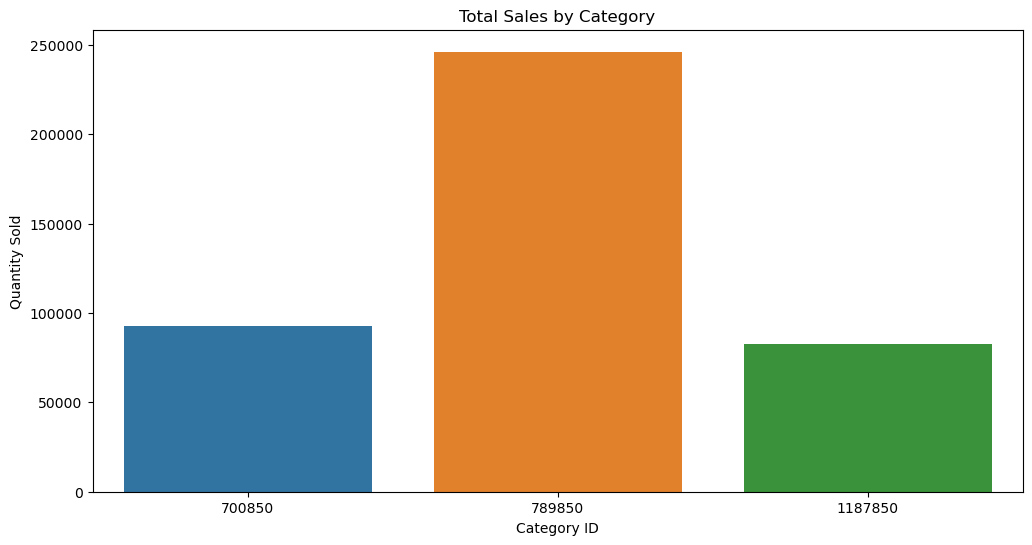

In [11]:
sales_by_category = daily_data.groupby('category_id')['qnt_out_sale'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_category, x='category_id', y='qnt_out_sale')
plt.title('Total Sales by Category')
plt.xlabel('Category ID')
plt.ylabel('Quantity Sold')
plt.show()


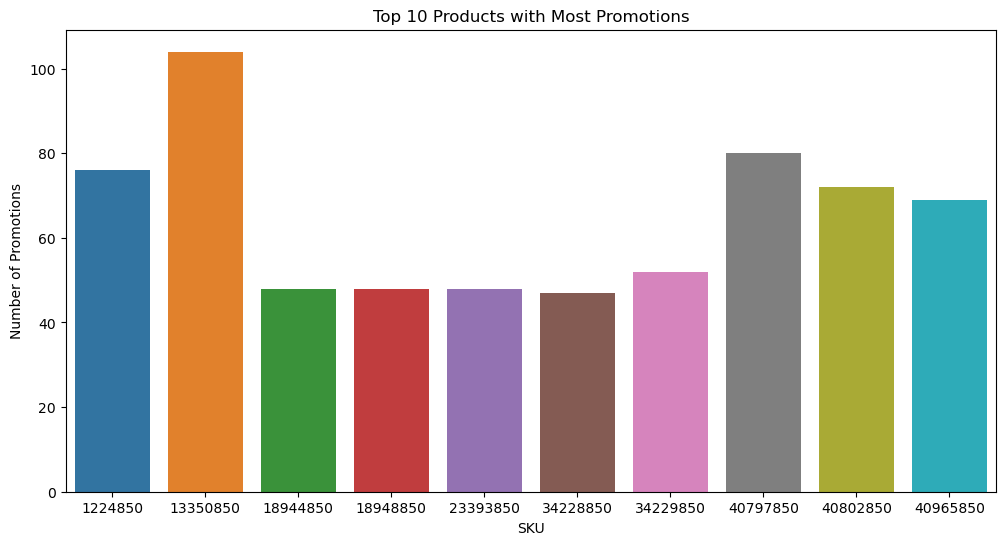

In [12]:
# Promotions Analysis
promotions_count = promo['sku'].value_counts().reset_index()
promotions_count.columns = ['sku', 'promotion_count']

plt.figure(figsize=(12, 6))
sns.barplot(data=promotions_count.head(10), x='sku', y='promotion_count')
plt.title('Top 10 Products with Most Promotions')
plt.xlabel('SKU')
plt.ylabel('Number of Promotions')
plt.show()

/var/folders/gr/0c7p9r_s4hsbtm9g6rybp0lh0000gn/T/ipykernel_86152/2949473194.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = daily_data.corr()


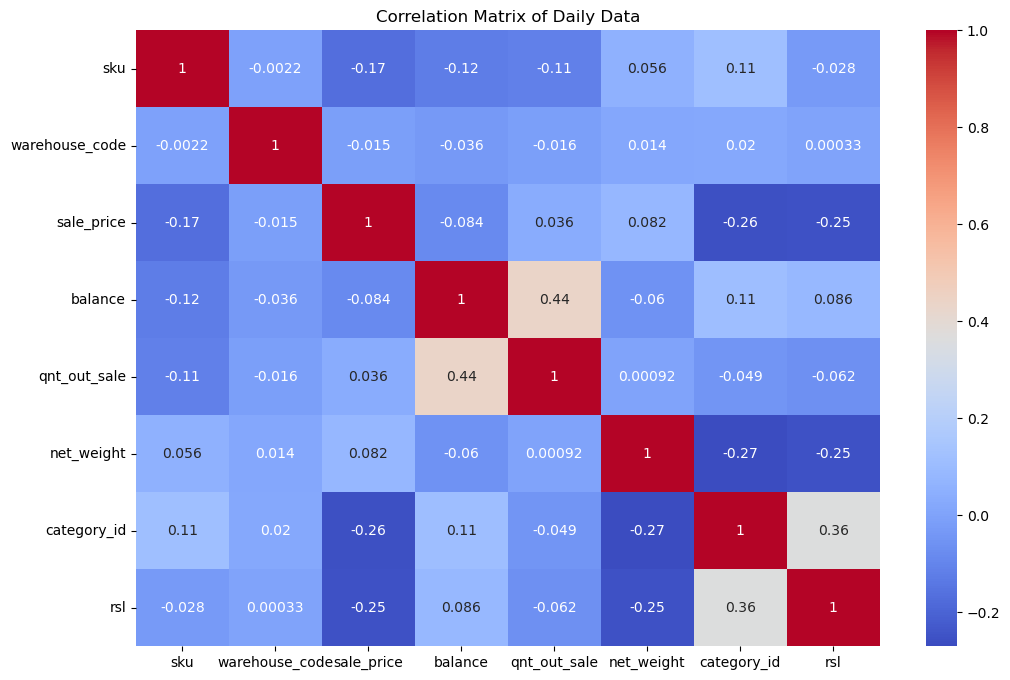

In [13]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = daily_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Data')
plt.show()

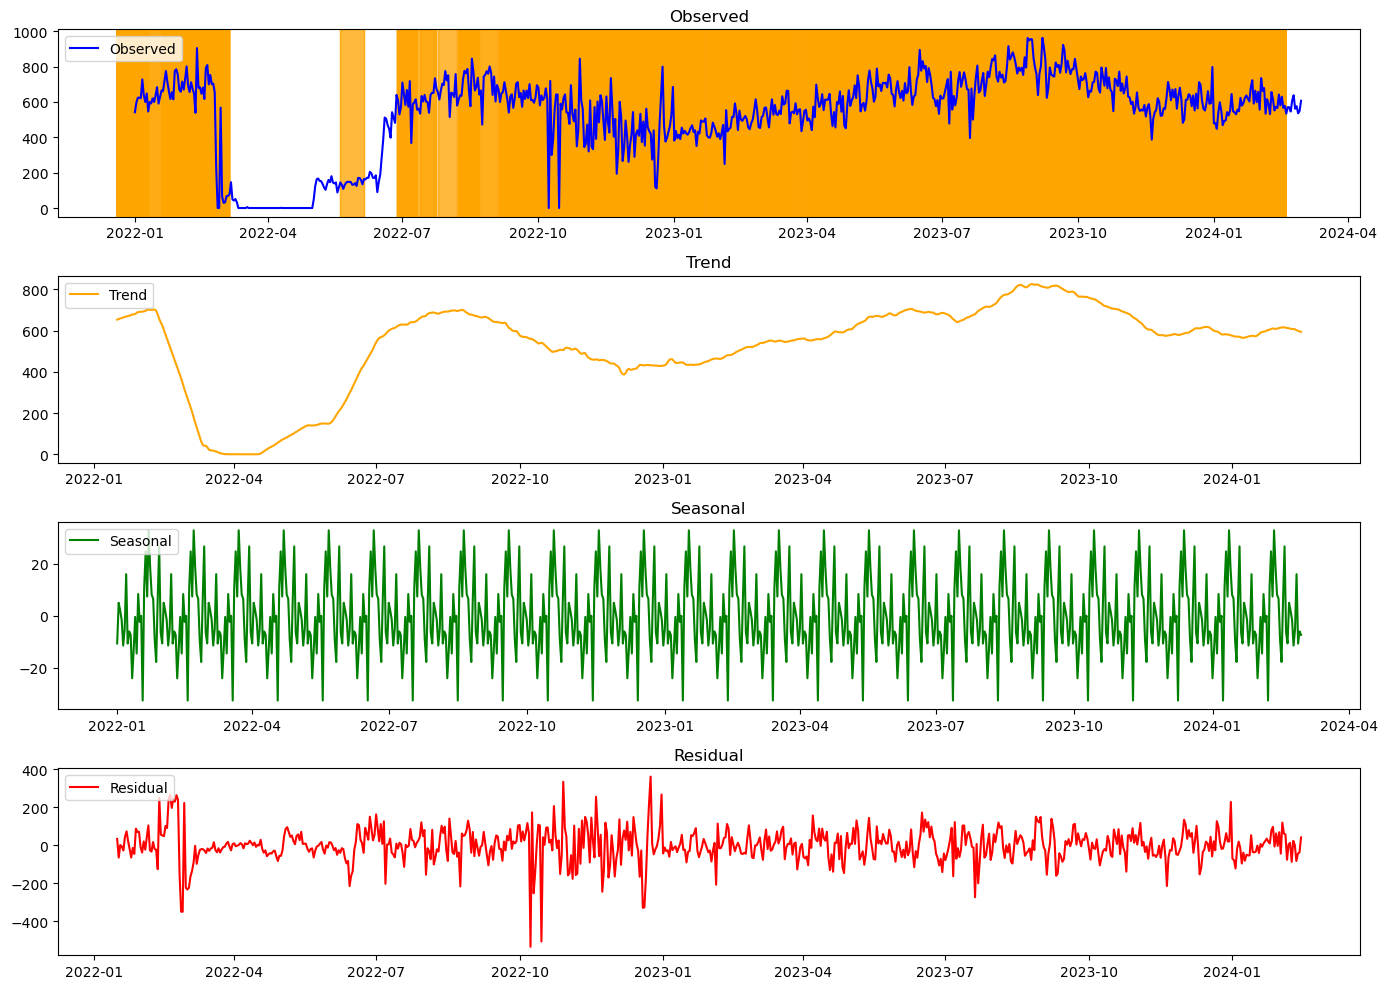

In [26]:
time_series_data = daily_sales.set_index('date')['qnt_out_sale']
decomposition = seasonal_decompose(time_series_data, model='additive', period=30)

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
for _, row in promo.iterrows():
    plt.axvspan(row['begin_date'], row['end_date'], color='orange', alpha=0.3)
plt.legend(loc='upper left')
plt.title('Observed')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual')
plt.tight_layout()
plt.show()

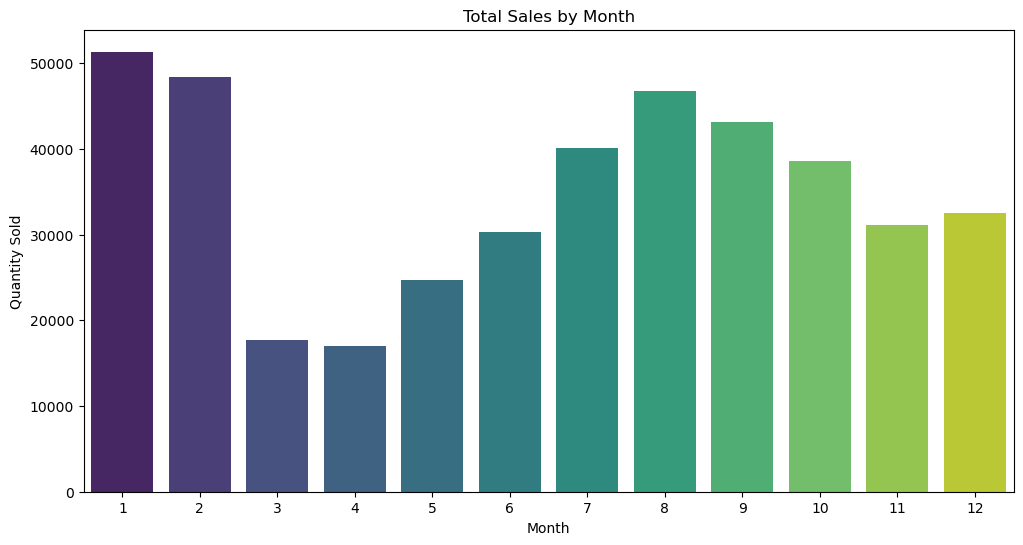

In [16]:
# Seasonal Sales Analysis
daily_data['month'] = daily_data['date'].dt.month
monthly_sales = daily_data.groupby('month')['qnt_out_sale'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month', y='qnt_out_sale', palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()

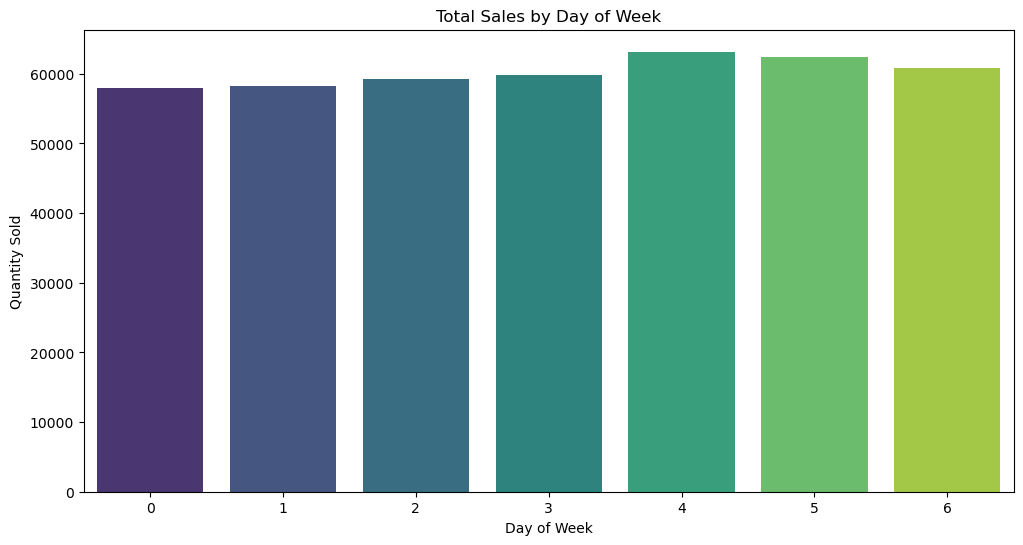

In [17]:
daily_data['day_of_week'] = daily_data['date'].dt.dayofweek
weekly_sales = daily_data.groupby('day_of_week')['qnt_out_sale'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='day_of_week', y='qnt_out_sale', palette='viridis')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Quantity Sold')
plt.show()

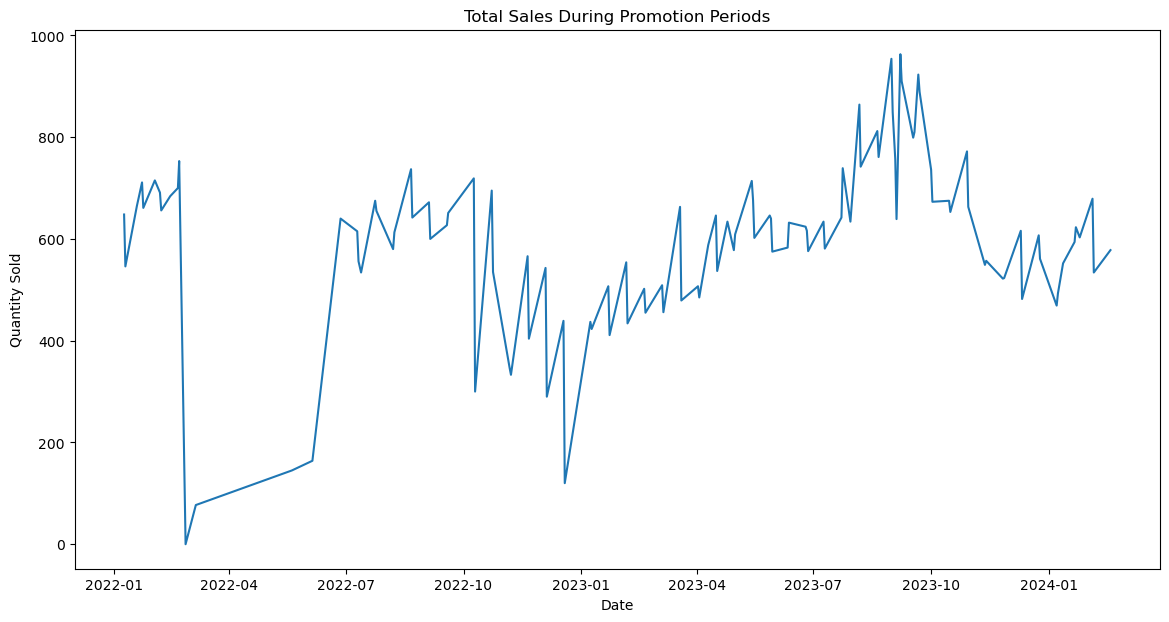

In [18]:
promo_sales = daily_data[daily_data['date'].isin(promo['begin_date']) | daily_data['date'].isin(promo['end_date'])]
promo_sales_total = promo_sales.groupby('date')['qnt_out_sale'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=promo_sales_total, x='date', y='qnt_out_sale')
plt.title('Total Sales During Promotion Periods')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

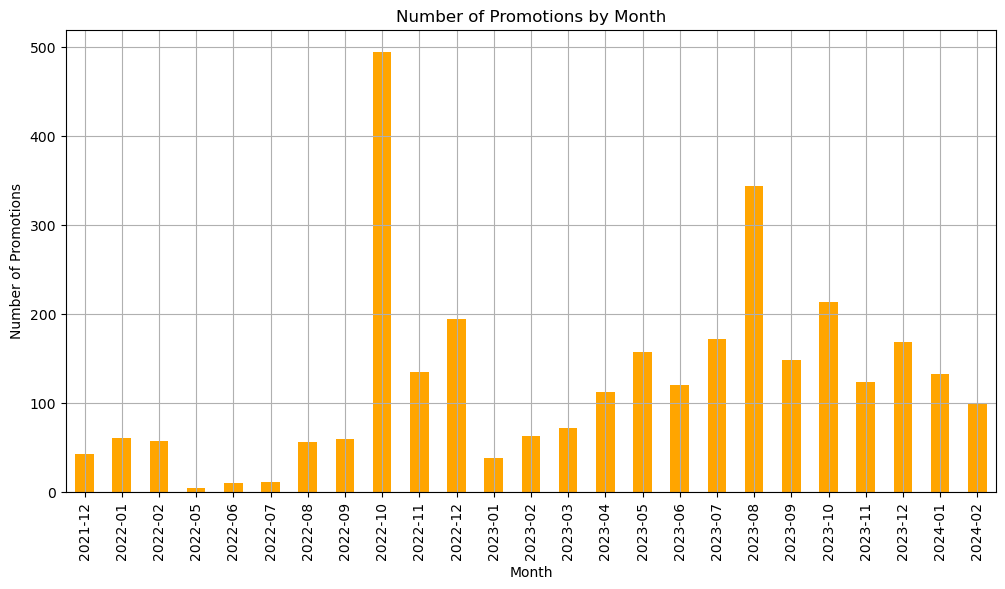

In [27]:
# Number of promotions by month
promo['month'] = promo['begin_date'].dt.to_period('M')
promo_counts = promo['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
promo_counts.plot(kind='bar', color='orange')
plt.title('Number of Promotions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Promotions')
plt.grid(True)
plt.show()

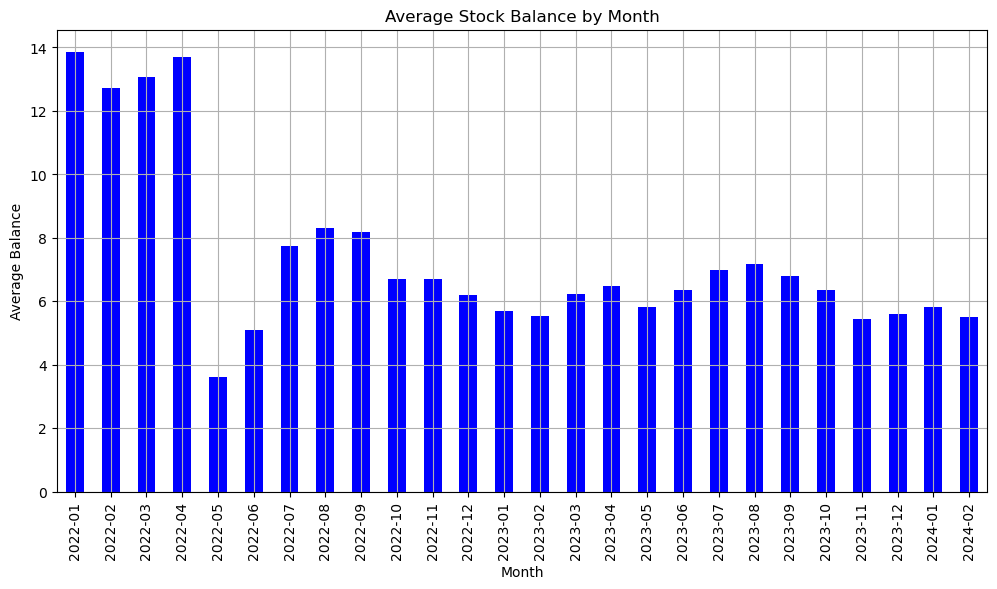

In [28]:
# Average balance by month
daily_data['month'] = daily_data['date'].dt.to_period('M')
avg_balance = daily_data.groupby('month')['balance'].mean()

plt.figure(figsize=(12, 6))
avg_balance.plot(kind='bar', color='blue')
plt.title('Average Stock Balance by Month')
plt.xlabel('Month')
plt.ylabel('Average Balance')
plt.grid(True)
plt.show()

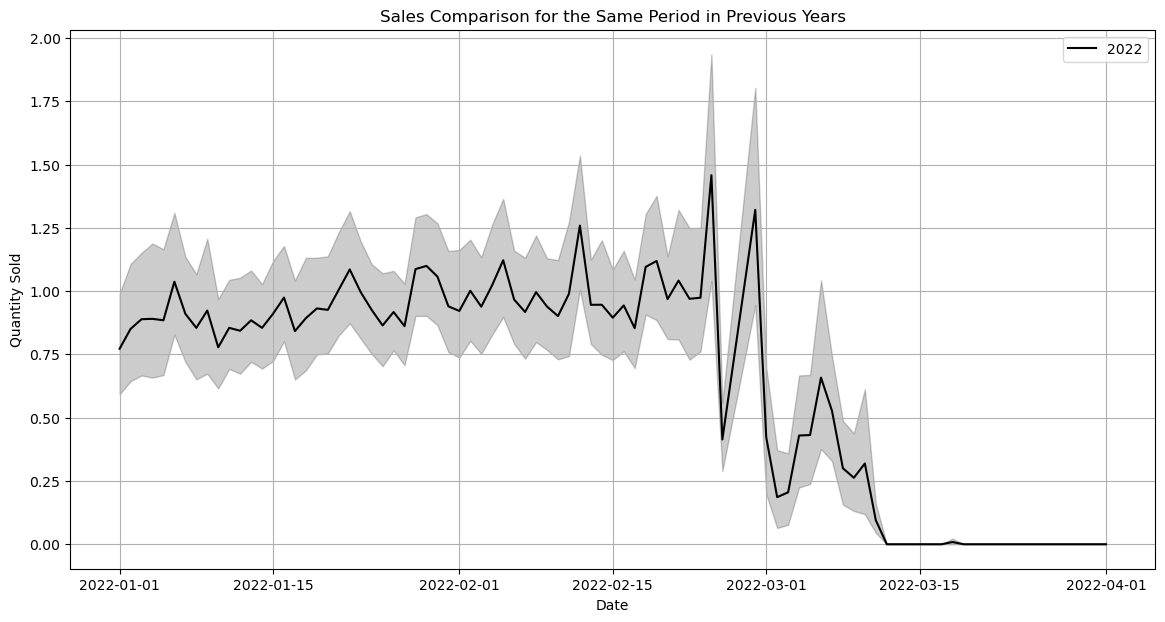

In [32]:
daily_data['year'] = daily_data['date'].dt.year
daily_data['month_day'] = daily_data['date'].dt.strftime('%m-%d')

sales_early_2022 = daily_data[(daily_data['year'] == 2022) & (daily_data['date'] <= '2022-04-01')]
sales_previous_years = daily_data[(daily_data['year'] < 2022) & (daily_data['month_day'] <= '04-01')]

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_previous_years, x='date', y='qnt_out_sale', hue='year', palette='Set1')
sns.lineplot(data=sales_early_2022, x='date', y='qnt_out_sale', color='black', label='2022')
plt.title('Sales Comparison for the Same Period in Previous Years')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.legend()
plt.show()

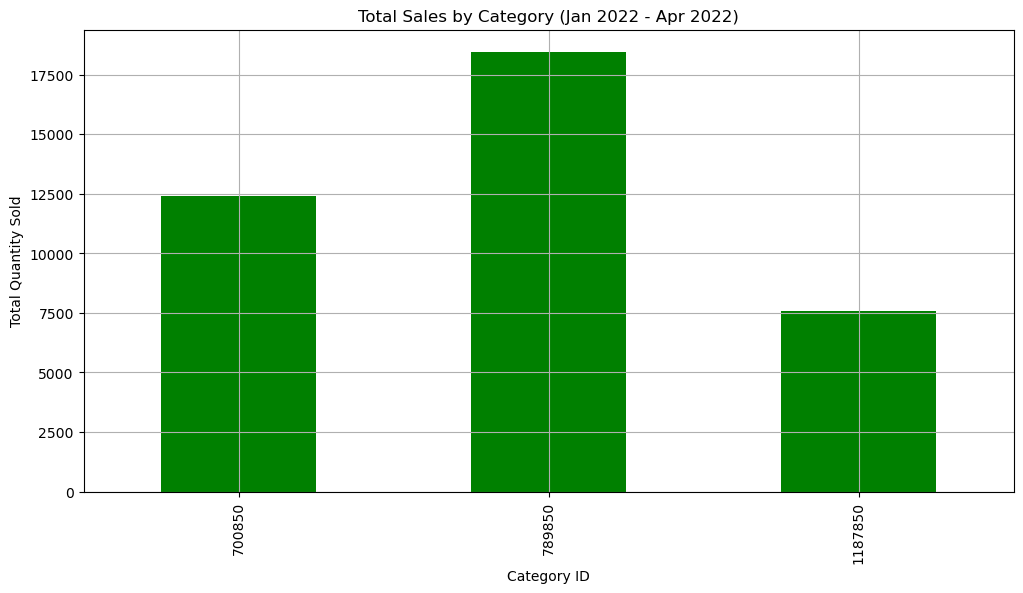

In [30]:
# Sales by product category for the period in question
sales_by_category_early_2022 = daily_data[(daily_data['date'] <= '2022-04-01')].groupby('category_id')['qnt_out_sale'].sum()

plt.figure(figsize=(12, 6))
sales_by_category_early_2022.plot(kind='bar', color='green')
plt.title('Total Sales by Category (Jan 2022 - Apr 2022)')
plt.xlabel('Category ID')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

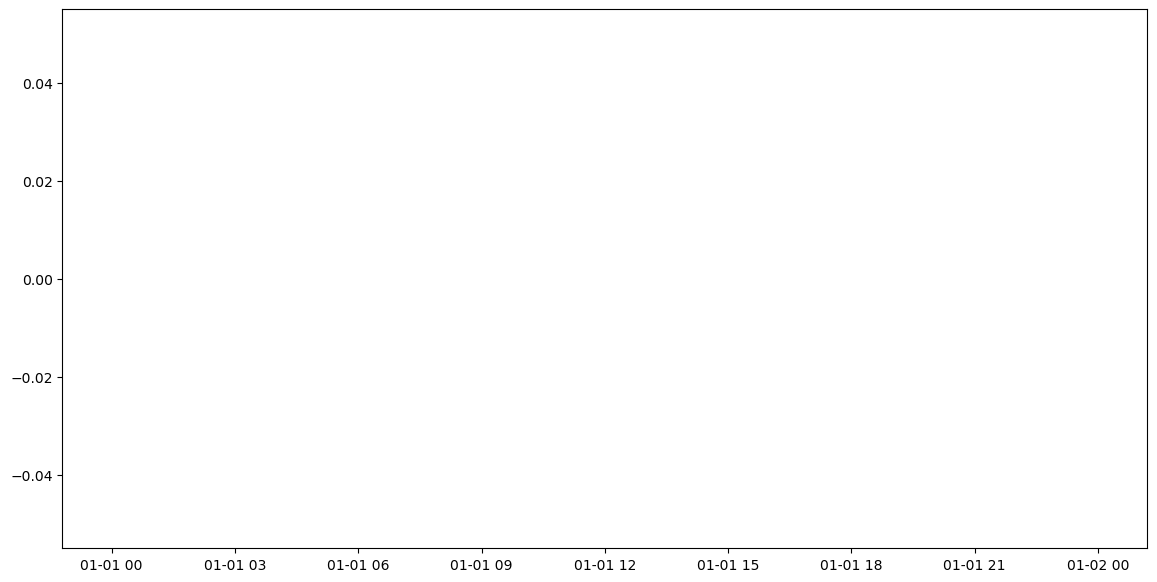

In [19]:
# Sales Before and After Promotions
promo_period_sales = []

for _, row in promo.iterrows():
    promo_sku = row['sku']
    promo_start = row['begin_date']
    promo_end = row['end_date']
    before_promo = daily_data[(daily_data['sku'] == promo_sku) & (daily_data['date'] < promo_start)].groupby('date')['qnt_out_sale'].sum().reset_index()
    after_promo = daily_data[(daily_data['sku'] == promo_sku) & (daily_data['date'] > promo_end)].groupby('date')['qnt_out_sale'].sum().reset_index()
    during_promo = daily_data[(daily_data['sku'] == promo_sku) & (daily_data['date'] >= promo_start) & (daily_data['date'] <= promo_end)].groupby('date')['qnt_out_sale'].sum().reset_index()
    
    before_promo['period'] = 'Before'
    after_promo['period'] = 'After'
    during_promo['period'] = 'During'
    
    promo_period_sales.append(before_promo)
    promo_period_sales.append(after_promo)
    promo_period_sales.append(during_promo)

promo_period_sales_df = pd.concat(promo_period_sales)

plt.figure(figsize=(14, 7))
sns.lineplot(data=promo_period_sales_df, x='date', y='qnt_out_sale', hue='period')
plt.title('Sales Before, During, and After Promotions')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

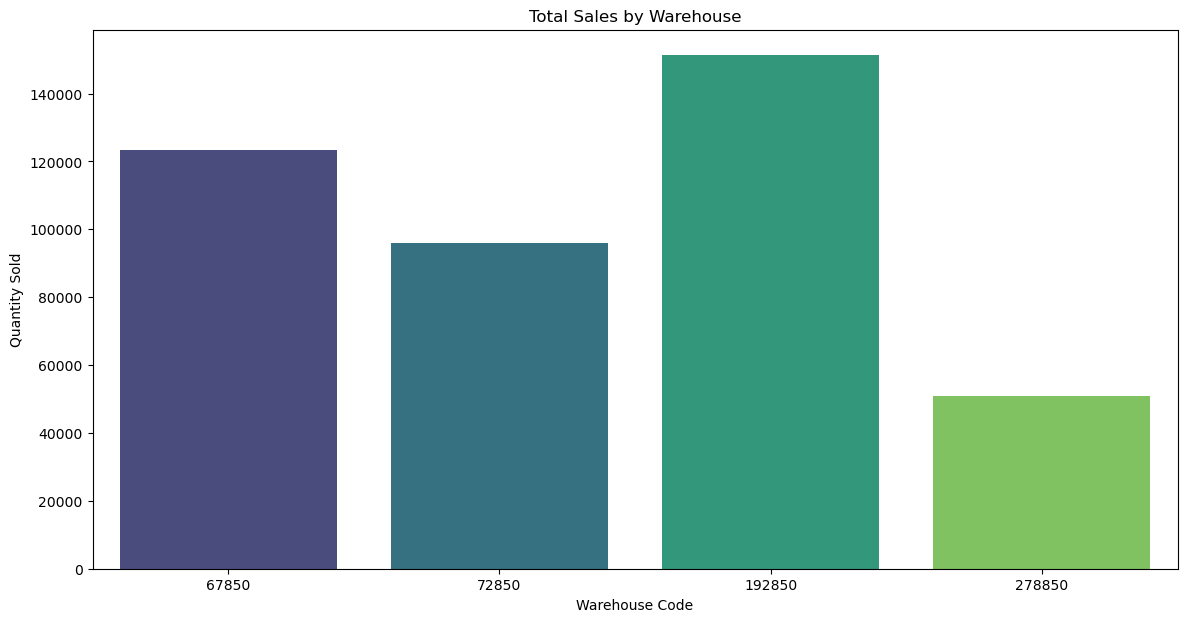

In [20]:
sales_by_warehouse = daily_data.groupby('warehouse_code')['qnt_out_sale'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_warehouse, x='warehouse_code', y='qnt_out_sale', palette='viridis')
plt.title('Total Sales by Warehouse')
plt.xlabel('Warehouse Code')
plt.ylabel('Quantity Sold')
plt.show()

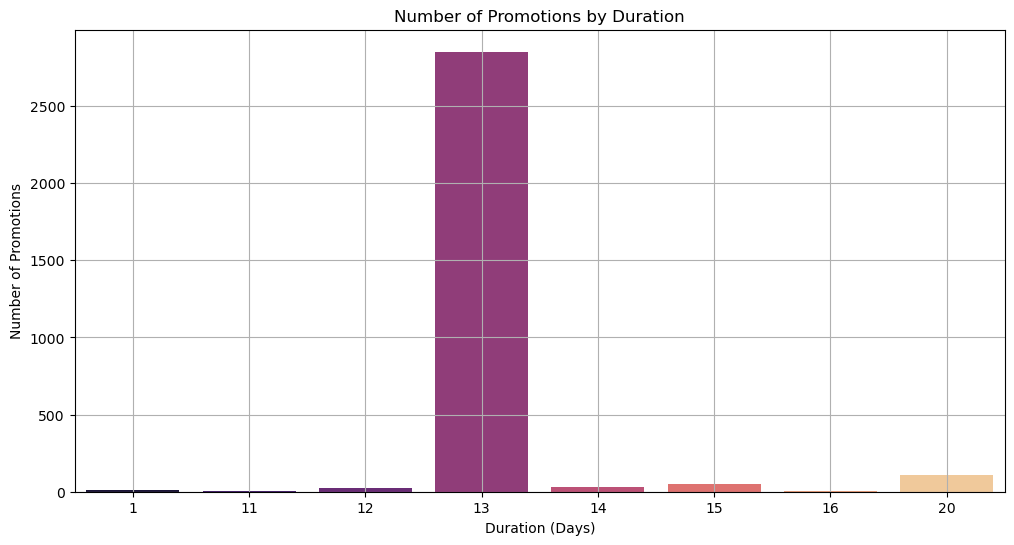

In [37]:
# Analyze promotion duration and timing
promo['duration'] = (promo['end_date'] - promo['begin_date']).dt.days
promo_duration = promo.groupby('duration')['id'].count().reset_index()
promo_duration.columns = ['Duration (Days)', 'Number of Promotions']

plt.figure(figsize=(12, 6))
sns.barplot(data=promo_duration, x='Duration (Days)', y='Number of Promotions', palette='magma')
plt.title('Number of Promotions by Duration')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Promotions')
plt.grid(True)
plt.show()
